# FOR TESTING PURPOSES ONLY

In [1]:
import torch
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [13]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(device)

mps


In [30]:
from torchvision.models import ResNet50_Weights

model = models.resnet50(weights=ResNet50_Weights.IMAGENET22K)
model = torch.nn.Sequential(*list(model.children())[:-1])
model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/aymaneaaquil/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:21<00:00, 4.86MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [31]:
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]



In [32]:
path = 'train_dataset'

dataset = datasets.ImageFolder(root=path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

In [33]:
features = []
labels = []

In [34]:
model.eval()

with torch.no_grad():
    for images, label in dataloader:
        images = images.to(device)
        output = model(images)
        output = output.view(output.size(0), -1)
        features.append(output.cpu())
        labels.append(label.cpu())
features = torch.cat(features)
labels = torch.cat(labels)

In [35]:
torch.save(features, 'features.pth')
torch.save(labels, 'labels.pth')

In [36]:
features = torch.load('features.pth')
labels = torch.load('labels.pth')

/var/folders/d2/dsq0cfpj3wnf4dxf7hwsn5w00000gn/T/ipykernel_58774/4190261729.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch.load('features.pth')
/var/fo

In [37]:
features_np = features.numpy()
labels_np = labels.numpy()

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features_np)

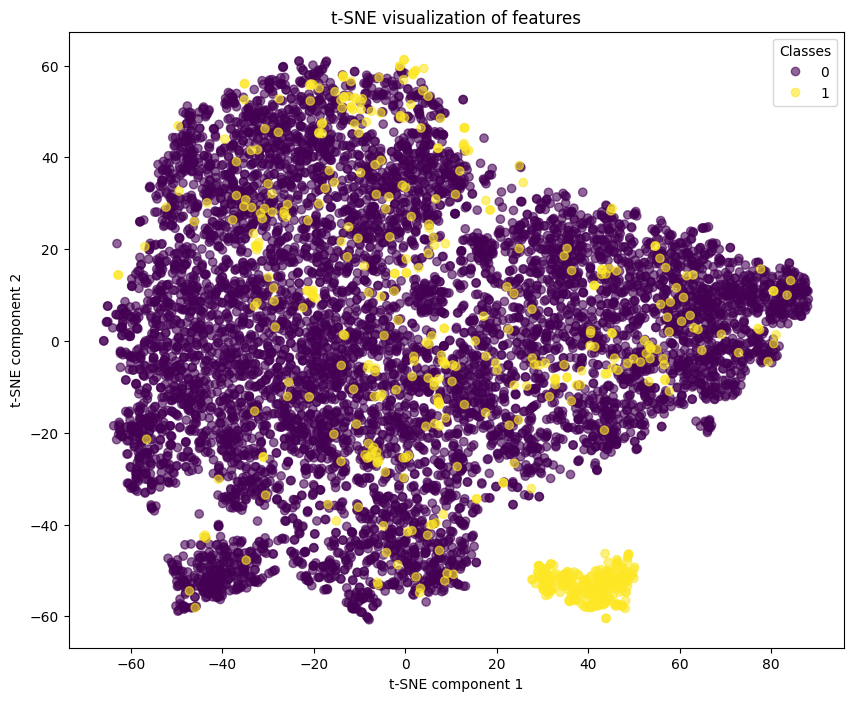

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels_np, cmap='viridis', alpha=0.6)

# Create a legend
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title("t-SNE visualization of features")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

In [42]:
from efficientnet_pytorch import EfficientNet
import torch.nn as nn

In [43]:
model = EfficientNet.from_pretrained('efficientnet-b7')

model._fc = nn.Identity() 



Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /Users/aymaneaaquil/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [01:20<00:00, 3.31MB/s] 


Loaded pretrained weights for efficientnet-b7


In [45]:
model.to(device)

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        64, 16, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        16, 64, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False
  

In [46]:
features = []
labels = []

model.eval()

with torch.no_grad():
    for images, label in dataloader:
        images = images.to(device)
        output = model(images)
        output = output.view(output.size(0), -1)
        features.append(output.cpu())
        labels.append(label.cpu())
features = torch.cat(features)
labels = torch.cat(labels)

In [47]:
features_np = features.numpy()
labels_np = labels.numpy()

In [48]:
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features_np)

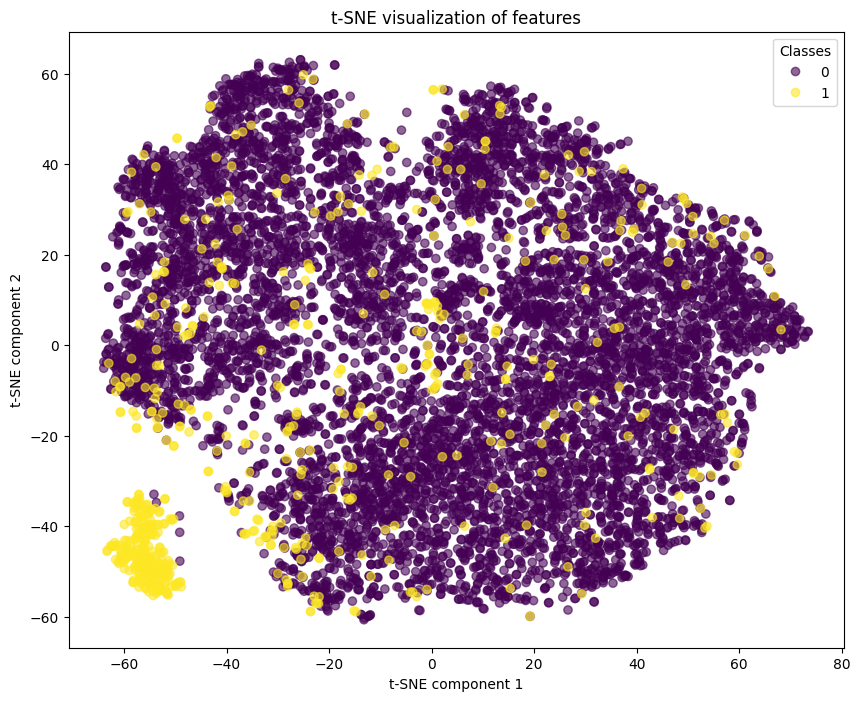

In [49]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels_np, cmap='viridis', alpha=0.6)

# Create a legend
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title("t-SNE visualization of features")q
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()